# BRFSS Dataset Exploration

Exploring the main 2015-2020 BRFSS dataset and associated cognitive decline content
https://www.cdc.gov/brfss/about/index.htm



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)







In [2]:
#Read in the 2015-2020 BRFSS Dataset csv

brfss = pd.read_csv(r"C:\Users\sdwin\OneDrive\RallyPoint\Machine Learning\AD\Alzheimer_s_Disease_and_Healthy_Aging_Data.csv")
print (brfss.shape)
print (brfss.head())
print (brfss.isnull().sum(axis=0))
print (brfss.Question.unique())

#Evaluate if all YearStart and YearEnd values are the same
year_comparison_column = np.where(brfss["YearStart"] == brfss["YearEnd"], True, False)
brfss["YearEqual"] = year_comparison_column
print ('Proportion of YearStart and YearEnd in the same year ', brfss.YearEqual.value_counts(normalize=True)) #~5% of records have different YearStart and YearEnd; survey may have spanned the New Year

#Drop records if YearStart and YearEnd are different, and evaluate for removal
brfss= brfss.query('YearStart == YearEnd')
year_comparison_column_2 = np.where(brfss["YearStart"] == brfss["YearEnd"], True, False)
brfss["YearEqual_2"] = year_comparison_column_2
print ('New proportion of YearStart and YearEnd in the same year ', brfss.YearEqual_2.value_counts(normalize=True))#100% YearStart and YearEnd concurrence
                                                                                                 
#Evaluate if there are any RowId values
print('RowId NaNs = ', brfss['RowId'].isnull().values.sum()) #all NaNs, column can be dropped

#Evaluate if Response column has any non-NaN values
print('Response NaNs = ' , brfss['Response'].isnull().values.sum()) #all NaNs, column can be dropped

#Evaluate if Datasource column is all BRFSS
print('Datasource is BRFSS = ', brfss['Datasource'].value_counts()) #all BRFSS, column can be dropped

#Evaluate if Data Value Type, Data Value Type ID, and Data Value Unity are similar for each row
print('Data Value Type ID = ', brfss['DataValueTypeID'].value_counts())
print('Data Value Unit = ', brfss['Data_Value_Unit'].value_counts())
print('Data Value Type = ', brfss['Data_Value_Type'].value_counts())
print('Stratification Category 1 = ', brfss['StratificationCategory1'].value_counts())

#Evaluate if Data_Value and Data_Value_Alt are the same
print((brfss['Data_Value'].dropna() == brfss['Data_Value_Alt'].dropna()).value_counts()) #drop Data Value Alt

#Evaluate if Sample Size is all NaNs
print('Sample Size = ' , brfss['Sample_Size'].isnull().values.sum())

#Evaluate if Geolocation gives any more info over and above State
print('# of Geolocation uniques = ', brfss['Geolocation'].nunique())
print('# of Location Abbr uniques = ', brfss['LocationAbbr'].nunique())
print('# of Location ID uniques = ', brfss['LocationID'].nunique())

#Drop unnecessary columns
brfss.drop(inplace=True, columns=['StratificationID2','StratificationCategoryID2','StratificationID1','ClassID', 'TopicID', 'StratificationCategory1','StratificationCategoryID1','Data_Value_Footnote', 'Data_Value_Footnote_Symbol','Class','Topic','RowId', 'Datasource', 'LocationDesc', 'YearEnd', 'Response', 'ResponseID', 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Alt', 'Sample_Size', 'StratificationCategory3', 'Stratification3', 'StratificationCategoryID3', 'StratificationID3', 'Geolocation', 'LocationID', 'Report', 'YearEqual'])

#Drop NaNs in the Data Value column
brfss.dropna(subset=['Data_Value'], inplace=True)




C:\Users\sdwin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(214462, 39)
   RowId  YearStart  YearEnd LocationAbbr LocationDesc Datasource  \
0    NaN       2020     2020           KY     Kentucky      BRFSS   
1    NaN       2020     2020           IA         Iowa      BRFSS   
2    NaN       2018     2018           IA         Iowa      BRFSS   
3    NaN       2015     2015           IA         Iowa      BRFSS   
4    NaN       2018     2018           KS       Kansas      BRFSS   

                                 Class                              Topic  \
0                       Overall Health  Fall with injury within last year   
1                       Overall Health       Arthritis among older adults   
2              Screenings and Vaccines        Colorectal cancer screening   
3  Nutrition/Physical Activity/Obesity                            Obesity   
4                       Overall Health     Prevalence of sufficient sleep   

                                            Question  Response  \
0  Percentage of older adults who have fall

In [3]:
#Print Stratfication1 values to determine if they are all age based
print (brfss['Stratification1'].unique()) 

#Rename Stratification1 to Age to be more informative
brfss.rename(inplace=True, columns={'Stratification1':'Age'})


['50-64 years' 'Overall' '65 years or older']


In [4]:
brfss.fillna(value={'Stratification2':'Overall', 'StratificationCategory2':'Overall'}, inplace=True) #Make Strat2 and StratCat2 columns more informative

sorted_brfss = brfss.sort_values(['LocationAbbr', 'YearStart', 'Question'])
sorted_brfss.head(20)



,YearStart,LocationAbbr,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age,StratificationCategory2,Stratification2,QuestionID,YearEqual_2
157954,2015,AK,Fair or poor health among older adults with do...,Percentage,30.6,24.0,38.1,65 years or older,Race/Ethnicity,"White, non-Hispanic",Q45,True
158139,2015,AK,Fair or poor health among older adults with do...,Percentage,28.8,20.8,38.4,65 years or older,Gender,Female,Q45,True
158773,2015,AK,Fair or poor health among older adults with do...,Percentage,26.9,21.1,33.6,50-64 years,Overall,Overall,Q45,True
159726,2015,AK,Fair or poor health among older adults with do...,Percentage,25.3,20.8,30.4,Overall,Race/Ethnicity,"White, non-Hispanic",Q45,True
160143,2015,AK,Fair or poor health among older adults with do...,Percentage,33.9,27.3,41.1,65 years or older,Overall,Overall,Q45,True
161030,2015,AK,Fair or poor health among older adults with do...,Percentage,42.4,31.9,53.6,65 years or older,Gender,Male,Q45,True
161543,2015,AK,Fair or poor health among older adults with do...,Percentage,20.6,14.2,28.9,50-64 years,Gender,Male,Q45,True
161769,2015,AK,Fair or poor health among older adults with do...,Percentage,20.8,15.2,27.8,50-64 years,Race/Ethnicity,"White, non-Hispanic",Q45,True
164347,2015,AK,Fair or poor health among older adults with do...,Percentage,47.7,33.6,62.1,Overall,Race/Ethnicity,Native Am/Alaskan Native,Q45,True
164552,2015,AK,Fair or poor health among older adults with do...,Percentage,28.8,22.5,35.9,Overall,Gender,Male,Q45,True


In [5]:
#Add in AD state mortality data from 2015-2020
#While there is a decade+ lag between initial cognitive decline and any assaociated AD deaths, there is no BRFSS cognitive decline data for earlier than 201
AD_mortality = pd.read_csv('AD_mortality_2020-2015.csv')
AD_brfss = brfss.merge(AD_mortality, how='left').rename(columns={'Rate':'AD_Mortality_Rate'})
AD_brfss.sort_values(by=['LocationAbbr', 'YearStart']).head()



,YearStart,LocationAbbr,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age,StratificationCategory2,Stratification2,QuestionID,YearEqual_2,AD_Mortality_Rate
102472,2015,AK,"Percentage of at risk adults (have diabetes, a...",Percentage,48.1,36.7,59.7,50-64 years,Gender,Male,Q09,True,16.7
102473,2015,AK,Percentage of older adults who reported influe...,Percentage,40.3,31.4,50.0,Overall,Race/Ethnicity,Native Am/Alaskan Native,Q18,True,16.7
102509,2015,AK,Percentage of older adults who had a cholester...,Percentage,89.5,85.7,92.3,Overall,Gender,Female,Q14,True,16.7
102618,2015,AK,Percentage of older adults who have been told ...,Percentage,65.4,55.4,74.3,50-64 years,Gender,Male,Q04,True,16.7
102679,2015,AK,Percentage of older adults without diabetes wh...,Percentage,58.3,53.0,63.4,50-64 years,Race/Ethnicity,"White, non-Hispanic",Q19,True,16.7


In [6]:
#% of adults with worsening SCD + AD Mortality Rate
AD_brfss[AD_brfss.QuestionID == 'Q30'].groupby(['Question', 'LocationAbbr','Age','Stratification2','YearStart']).agg({'Data_Value':'mean', 'AD_Mortality_Rate':'mean'})

Data_Value  \
Question                                           LocationAbbr Age               Stratification2          YearStart               
Percentage of older adults who reported subject... AK           50-64 years       Female                   2016             11.4   
                                                                                                           2020              8.0   
                                                                                  Male                     2016             10.5   
                                                                                                           2020              5.6   
                                                                                  Overall                  2016             10.9   
                                                                                                           2020              6.8   
                                                                                  White, non-Hispanic      2016             10.7   
                                                                                                           2020              5.9   
                                                                65 years or older Female                   2016             14.4   
                                                                                                           2020              8.2   
                                                                                  Male                     2016             15.7   
                                                                                                           2020             12.5   
                                                                                  Overall                  2016             15.0   
                                                                                                           2020             10.3   
                                                                                  White, non-Hispanic      2016             18.2   
                                                                                                           2020             10.9   
                                                                Overall           Female                   2016             12.5   
                                                                                                           2020              8.0   
                                                                                  Male                     2016             12.3   
                                                                                                           2020              8.5   
                                                                                  Native Am/Alaskan Native 2016             10.6   
                                                                                  Overall                  2016             12.4   
                                                                                                           2020              8.3   
                                                                                  White, non-Hispanic      2016             13.4   
                                                                                                           2020              8.2   
                                                   AL           50-64 years       Black, non-Hispanic      2015             12.7   
                                                                                                           2019             13.8   
                                                                                  Female                   2015             15.1   
                                                                                                           2019             14.8   
                          

In [7]:
brfss_age_overall = AD_brfss[AD_brfss['Age'] == 'Overall']
brfss_age_strat2overall = brfss_age_overall[brfss_age_overall['Stratification2'] == 'Overall']
q30_plot = brfss_age_strat2overall[brfss_age_strat2overall.QuestionID == 'Q30'].groupby(['Question', 'LocationAbbr','Age','Stratification2','YearStart']).agg({'Data_Value':'mean', 'AD_Mortality_Rate':'mean'})
q30_plot

Data_Value  \
Question                                           LocationAbbr Age     Stratification2 YearStart               
Percentage of older adults who reported subject... AK           Overall Overall         2016             12.4   
                                                                                        2020              8.3   
                                                   AL           Overall Overall         2015             12.8   
                                                                                        2019             14.7   
                                                   AR           Overall Overall         2015             16.5   
                                                                                        2020             11.7   
                                                   AZ           Overall Overall         2015             13.2   
                                                                                        2020              9.4   
                                                   CA           Overall Overall         2015             12.0   
                                                                                        2020              8.0   
                                                   CO           Overall Overall         2015             11.2   
                                                   CT           Overall Overall         2016              7.6   
                                                                                        2019              7.8   
                                                   DC           Overall Overall         2015             13.8   
                                                                                        2019             11.0   
                                                                                        2020              9.4   
                                                   DE           Overall Overall         2016              8.8   
                                                                                        2020              8.4   
                                                   FL           Overall Overall         2015             11.8   
                                                                                        2019             13.5   
                                                   GA           Overall Overall         2015             14.6   
                                                                                        2017             12.4   
                                                                                        2019             11.3   
                                                   HI           Overall Overall         2015              9.5   
                                                                                        2017              8.7   
                                                                                        2020              6.9   
                                                   IA           Overall Overall         2015              9.8   
                                                                                        2019             10.6   
                                                   ID           Overall Overall         2016             10.8   
                                                                                        2020             10.1   
                                                   IL           Overall Overall         2015             10.3   
                                                                                        2020              6.0   
                                                   IN           Overall Overall         2016             10.8   
                                                                                        2019             12.0   
                               

In [8]:
brfss_q30 = brfss[brfss.QuestionID == 'Q30'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']
AD_brfss_q30 = brfss_q30.merge(AD_mortality, how='left').rename(columns={'Rate':'AD_Mortality_Rate'})

print (AD_brfss_q30.head())

   YearStart LocationAbbr                                           Question  \
0       2019           IA  Percentage of older adults who reported subjec...   
1       2019           KS  Percentage of older adults who reported subjec...   
2       2019           IN  Percentage of older adults who reported subjec...   
3       2016           KS  Percentage of older adults who reported subjec...   
4       2015           IA  Percentage of older adults who reported subjec...   

  Data_Value_Type  Data_Value Low_Confidence_Limit High_Confidence_Limit  \
0      Percentage        10.6                  9.7                  11.6   
1      Percentage        11.9                 10.6                  13.4   
2      Percentage        12.0                 11.0                  13.2   
3      Percentage         9.4                  8.3                  10.6   
4      Percentage         9.8                  8.6                  11.0   

       Age StratificationCategory2 Stratification2 QuestionID 

C:\Users\sdwin\AppData\Local\Temp/ipykernel_113800/3388542525.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brfss_q30 = brfss[brfss.QuestionID == 'Q30'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']


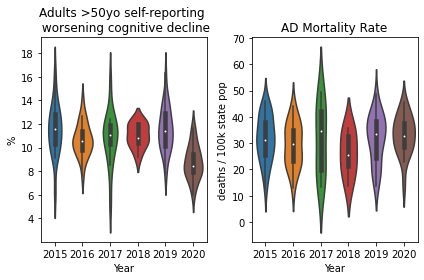

In [9]:
fig, axes = plt.subplots(1, 2)

#fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)

sns.violinplot(x="YearStart", y="Data_Value", data=brfss_q30, ax=axes[0]).set(ylabel='%', xlabel='Year', title='Adults >50yo self-reporting \n worsening cognitive decline')

sns.violinplot(x="YearStart", y='AD_Mortality_Rate', data=AD_brfss_q30, ax=axes[1]). set(title='AD Mortality Rate', xlabel='Year', ylabel='deaths / 100k state pop')

plt.tight_layout()
plt.show()


In [10]:
brfss_q31 = brfss[brfss.QuestionID == 'Q31'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']
brfss_q31

C:\Users\sdwin\AppData\Local\Temp/ipykernel_113800/1333811328.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brfss_q31 = brfss[brfss.QuestionID == 'Q31'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']


,YearStart,LocationAbbr,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age,StratificationCategory2,Stratification2,QuestionID,YearEqual_2
1703,2019,IN,Percentage of older adults who reported subjec...,Percentage,37.0,32.3,41.9,Overall,Overall,Overall,Q31,True
2365,2019,KS,Percentage of older adults who reported subjec...,Percentage,31.9,26.3,38.2,Overall,Overall,Overall,Q31,True
7079,2015,IA,Percentage of older adults who reported subjec...,Percentage,23.7,19.0,29.1,Overall,Overall,Overall,Q31,True
7566,2020,AZ,Percentage of older adults who reported subjec...,Percentage,38.2,32.1,44.8,Overall,Overall,Overall,Q31,True
10055,2018,ME,Percentage of older adults who reported subjec...,Percentage,32.2,25.8,39.4,Overall,Overall,Overall,Q31,True
12337,2017,MD,Percentage of older adults who reported subjec...,Percentage,33.2,25.4,41.9,Overall,Overall,Overall,Q31,True
12675,2020,ME,Percentage of older adults who reported subjec...,Percentage,24.8,20.2,30.0,Overall,Overall,Overall,Q31,True
13105,2016,ME,Percentage of older adults who reported subjec...,Percentage,30.0,24.3,36.4,Overall,Overall,Overall,Q31,True
15160,2015,LA,Percentage of older adults who reported subjec...,Percentage,43.3,36.9,49.9,Overall,Overall,Overall,Q31,True
17472,2015,MD,Percentage of older adults who reported subjec...,Percentage,32.8,24.7,42,Overall,Overall,Overall,Q31,True


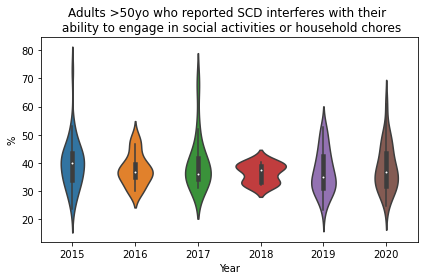

In [11]:
sns.violinplot(x="YearStart", y="Data_Value", data=brfss_q31).set(ylabel='%', xlabel='Year', title='Adults >50yo who reported SCD interferes with their \n ability to engage in social activities or household chores')

plt.tight_layout()
plt.show()

C:\Users\sdwin\AppData\Local\Temp/ipykernel_113800/2152460234.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brfss_q13 = brfss[brfss.QuestionID == 'Q13'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']


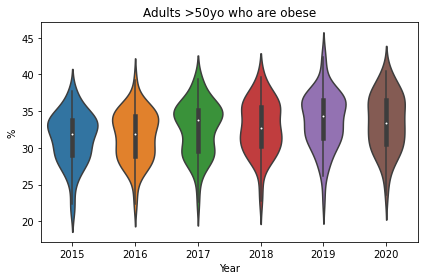

In [12]:
#Question 13 'Percentage of older adults who are currently obese, with a body mass index (BMI) of 30 or more'

brfss_q13 = brfss[brfss.QuestionID == 'Q13'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']
sns.violinplot(x="YearStart", y="Data_Value", data=brfss_q13).set(ylabel='%', xlabel='Year', title='Adults >50yo who are obese')

plt.tight_layout()
plt.show()


C:\Users\sdwin\AppData\Local\Temp/ipykernel_113800/3908683670.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brfss_q17 = brfss[brfss.QuestionID == 'Q17'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']


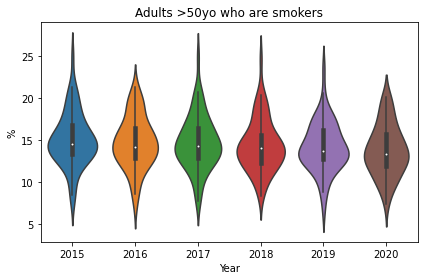

In [13]:
#Question 17  'Percentage of older adults who have smoked at least 100 cigarettes in their entire life and still smoke every day or some days'

brfss_q17 = brfss[brfss.QuestionID == 'Q17'][brfss.Age == 'Overall'][brfss.Stratification2 == 'Overall']
sns.violinplot(x="YearStart", y="Data_Value", data=brfss_q17).set(ylabel='%', xlabel='Year', title='Adults >50yo who are smokers')

plt.tight_layout()
plt.show()